Importing the dependancies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and preprocessing

In [7]:
try:
    car_dataset = pd.read_csv('/car_purchasing.csv', encoding='utf-8')
except UnicodeDecodeError:
    car_dataset = pd.read_csv('/car_purchasing.csv', encoding='latin1')

In [9]:
car_dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
car_dataset.shape

(500, 9)

In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [12]:
car_dataset.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Splitting the data and target

In [13]:
X=car_dataset.drop(['customer name','customer e-mail','country','car purchase amount'],axis=1)
Y=car_dataset['car purchase amount']

In [14]:
print(X)

     gender        age  annual Salary  credit card debt    net worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]


In [15]:
print(Y)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64


Splitting data into training data and test data

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model training

    1.Linear Regression

In [18]:
#Loading the linear regression model
lin_reg_model=LinearRegression()

Fit the model to the training data

In [20]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [21]:
training_data_prediction = lin_reg_model.predict(X_train)

In [22]:
error_score= metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9999999811454401


Visualize the actual prices and predicted prices

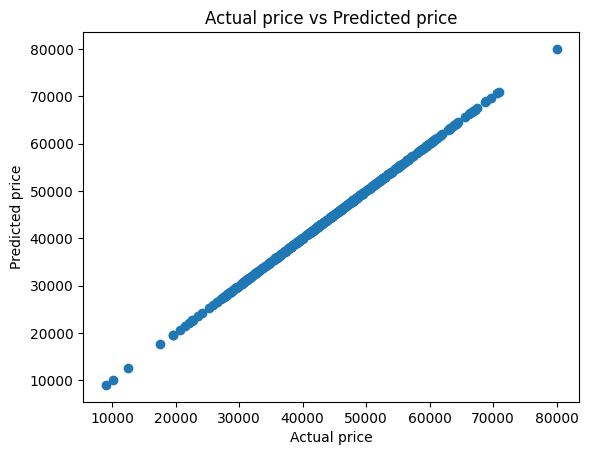

In [24]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [28]:
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9999999815973076


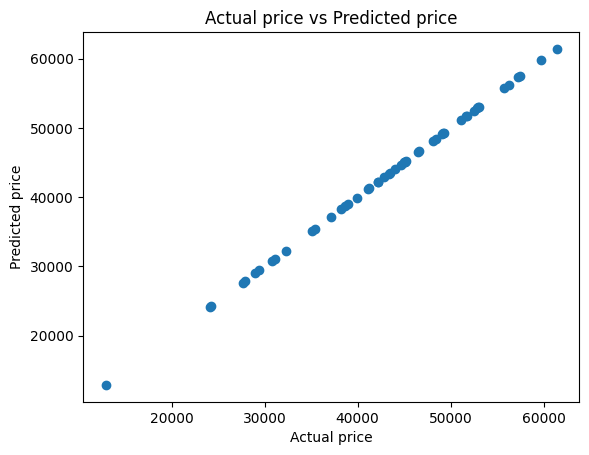

In [30]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

   2.Lasso Regreson Model

In [31]:
#Loading the linear regression model
lass_reg_model=Lasso()

Fit the model to the training data

In [32]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [33]:
training_data_prediction = lass_reg_model.predict(X_train)

In [34]:
error_score= metrics.r2_score(Y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.999999981009347


Visualize the actual prices and predicted prices

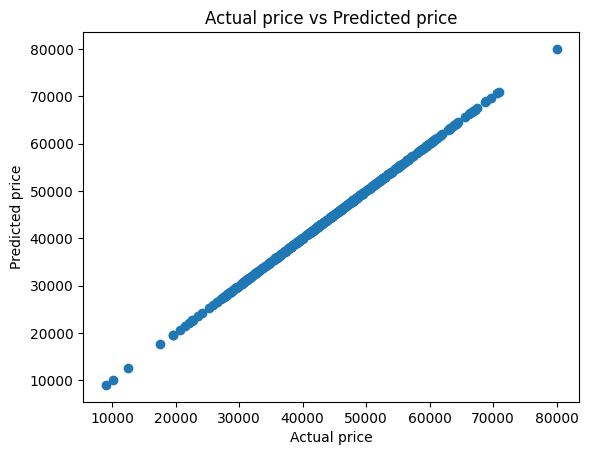

In [35]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [37]:
test_data_prediction = lass_reg_model.predict(X_test)

In [38]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9999999816772459


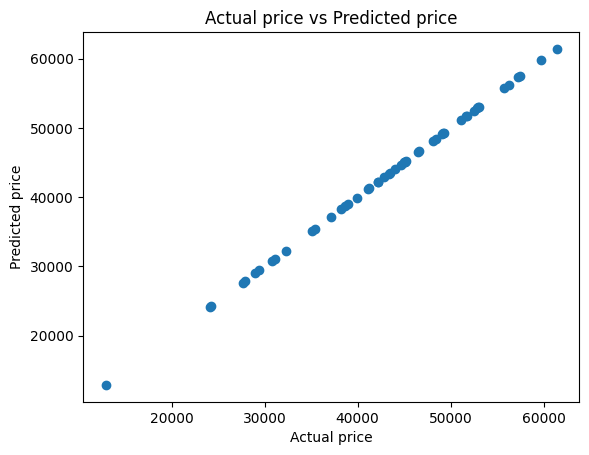

In [39]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()